(download_additional_information_data)=

# Download Additional Information data

In this tutorial we will show how can one access the additional information data that is stored in each scenario for a given package. To first show a concrete example, we will do this for [Atenonlol Pathway](https://envipath.org/package/7932e576-03c7-4106-819d-fe80dc605b8a/pathway/9b9e978e-8e31-427b-a75e-8ac1813612d8). In particular, we will access one scenario contained in Atenolol acid and extract all the metadata contained in it. Afterwards we will show the code that one can use to extend it this process to a whole package. Eventually we will explore the distribution of the location metadata for this package.

We first import the relevant enviPath objects for this tutorial

In [1]:
from enviPath_python.enviPath import enviPath
from enviPath_python.objects import *

import pandas as pd

As in other tutorials, we instantiate the host and the package we want to work with

In [2]:
INSTANCE_HOST = "https://envipath.org/"
EAWAG_SLUDGE_DATA_PACKAGE = "https://envipath.org/package/7932e576-03c7-4106-819d-fe80dc605b8a"

eP = enviPath(INSTANCE_HOST)
pkg = Package(eP.requester, id=EAWAG_SLUDGE_DATA_PACKAGE)

As discussed, we will access the metadata contained on Atenolol pathway and display it

In [3]:
atenolol_pathway = eP.search("Atenolol", pkg)["pathway"][0]
node = atenolol_pathway.get_nodes()[0]
scenario = node.get_scenarios()[0]
print(f"In this first example, we will explore the metadata contained in {scenario.get_id()}, ")
print(f"with name {scenario.get_name()}")
additional_information_list = scenario.get_additional_information()
additional_information_data = {}
for ai in additional_information_list:
    print(f"The Additional Information named {ai.name}")
    print(f"Has params: {ai.params}")
    additional_information_data[ai.name] = ai.params
df = pd.Series(additional_information_data, name=scenario.get_name())

In this first example, we will explore the metadata contained in https://envipath.org/package/7932e576-03c7-4106-819d-fe80dc605b8a/scenario/527e4bc8-ca4e-4810-b91d-6bd8abde89da, 
with name Helbling et al., 2012 (DOM5) - (00000)
The Additional Information named acidity
Has params: {'lowPh': '8.1', 'highPh': '8.1', 'acidityType': '', 'unit': 'pH'}
The Additional Information named biologicaltreatmenttechnology
Has params: {'biologicaltreatmenttechnology': 'nitrification & denitrification', 'unit': ''}
The Additional Information named bioreactor
Has params: {'bioreactortype': 'amber glass Schott bottles (loosely capped)', 'bioreactorsize': '100.0', 'unit': 'mL'}
The Additional Information named finalcompoundconcentration
Has params: {'finalcompoundconcentration': '100', 'unit': '&#956g/L'}
The Additional Information named inoculumsource
Has params: {'inoculumsource': 'activated sludge from biological aeration basin', 'unit': ''}
The Additional Information named location
Has params: {'locat

In the following lines of code, we show how to extract all the metadata of a package, the lines are commented out to reduce the amount of requests and computation time. The user can download this tutorial on the upper-right corner and test those lines by themselves if desired. The underlying logic can be described as follows:

1. Declare a `data` list where we will store all the information retrieved
2. Loop over each node on a pathway
    1. Extract all the scenarios
    2. For each scenario, get all the experimental data (additional information) and store it on the data 
    list together with its SMILES, node, scenario and pathway IDs and the scenario description
3. Create a pandas DataFrame and use it to generate a .csv file with all the extracted data

In [4]:

# data = []

# for path in pkg.get_pathways():
#     for node in path.get_nodes():
#         scenarios = node.get_scenarios()
#         for scenario in scenarios:
#             temp_data = {"smiles": node.get_smiles(), "node_id": node.get_id(), 
#                          "scenario_id": scenario.get_id(), "scenario_description": scenario.get_description(),
#                          "pathway_id": path.get_id()}
#             temp_add_info = scenario.get_additional_information()
#             for ai in temp_add_info:
#                 add_info = {ai.name + "_" + key: value for (key,value) in ai.params.items()}
#                 temp_data.update(add_info)
#             data.append(temp_data)
            
# # save data
# raw_data = pd.DataFrame(data)
# raw_data.to_csv("../assets/additional_information_data.csv", sep='\t', index=False)
raw_data = pd.read_csv("../assets/additional_information_data.csv", sep="\t")
raw_data.head()

,smiles,node_id,scenario_id,scenario_description,pathway_id,acidity_lowPh,acidity_highPh,acidity_acidityType,acidity_unit,biologicaltreatmenttechnology_biologicaltreatmenttechnology,...,oxygendemand_oxygendemandType,oxygendemand_oxygendemandInfluent,oxygendemand_oxygendemandEffluent,oxygendemand_unit,dissolvedorganiccarbon_dissolvedorganiccarbonStart,dissolvedorganiccarbon_dissolvedorganiccarbonEnd,dissolvedorganiccarbon_unit,volatiletts_volatilettsStart,volatiletts_volatilettsEnd,volatiletts_unit
0,C1=CC(=C(C=C1)N2CCNCC2)Cl,https://envipath.org/package/7932e576-03c7-410...,https://envipath.org/package/7932e576-03c7-410...,no description,https://envipath.org/package/7932e576-03c7-410...,8.1,8.1,NaN,pH,nitrification & denitrification & biological p...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C1=CC(=C(C=C1)N2CCNCC2)Cl,https://envipath.org/package/7932e576-03c7-410...,https://envipath.org/package/7932e576-03c7-410...,no description,https://envipath.org/package/7932e576-03c7-410...,6.3,6.3,NaN,pH,nitrification & denitrification & biological p...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C1=CC(=C(C=C1)N2CCNCC2)Cl,https://envipath.org/package/7932e576-03c7-410...,https://envipath.org/package/7932e576-03c7-410...,no description,https://envipath.org/package/7932e576-03c7-410...,7.1,7.1,NaN,pH,nitrification & denitrification & biological p...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CC12CCC3C4=CC=C(C=C4CCC3C2CCC1=O)O,https://envipath.org/package/7932e576-03c7-410...,https://envipath.org/package/7932e576-03c7-410...,https://doi.org/10.1023/A:1014117329403,https://envipath.org/package/7932e576-03c7-410...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CC12CCC3C4=CC=C(C=C4CCC3C2CCC1=O)O,https://envipath.org/package/7932e576-03c7-410...,https://envipath.org/package/7932e576-03c7-410...,https://doi.org/10.1023/A:1014117329403,https://envipath.org/package/7932e576-03c7-410...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finally, we use the extracted data to analyze the locations of each experiment in EAWAG-SLUDGE. To do this we map similar locations to a common name, i.e. (Dübendorf, WWTP Duebendorf (ARA Neugut), Switzerland, ...) -> Dübendorf, Switzerland

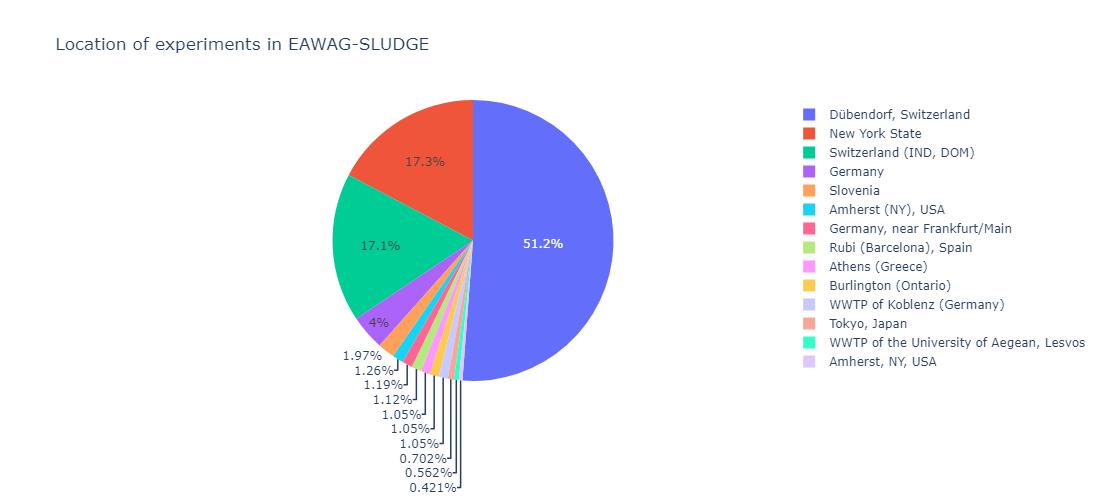

In [6]:
import plotly.express as px

def process_location(df):
    if pd.notna(df):
        if "Duebendorf" in df or "Dübendorf" in df:
            return "Dübendorf, Switzerland"
        elif "IND" in df or "DOM" in df:
            return "Switzerland (IND, DOM)"
        elif "4 parallel" in df:
            return df.split("-->")[0]
    return df

plot_df = raw_data
plot_df.location_location = plot_df.location_location.apply(lambda x: process_location(x))
plot_df = plot_df[["smiles", "scenario_id", "location_location"]].groupby(["scenario_id", "location_location"]).count().reset_index()[["location_location", "smiles"]].groupby("location_location").sum().reset_index()
plot_df.rename(columns={"location_location": "location", "smiles": "count"}, inplace=True)
px.pie(plot_df, names="location", values="count", title="Location of experiments in EAWAG-SLUDGE",
       width=900, height=500)

We see that there Dübendorf, Switzerland is the predominant location on our dataset. In the same way, one could analyze other relevant features, such as temperature, pH or half lives